# Payment Date Prediction 


### Importing related Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

### Store the dataset into the Dataframe


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset .csv")

### Check the shape of the dataframe


In [4]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  int64  
 5   doc_id                  50000 non-null  int64  
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  int64  
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [6]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [7]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [8]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [9]:
df.isnull().sum() * 100 / len(df)

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [10]:
 df.loc[:, [ 'invoice_id' , 'doc_id' ]]

,invoice_id,doc_id
0,1.930438e+09,1930438491
1,1.929646e+09,1929646410
2,1.929874e+09,1929873765
3,2.960623e+09,2960623488
4,1.930148e+09,1930147974
...,...,...
49995,1.930797e+09,1930797071
49996,1.929744e+09,1929744070
49997,1.930537e+09,1930536775
49998,1.930199e+09,1930198546


### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [11]:
 df.loc[:, [ 'invoice_id' , 'doc_id' ]]

,invoice_id,doc_id
0,1.930438e+09,1930438491
1,1.929646e+09,1929646410
2,1.929874e+09,1929873765
3,2.960623e+09,2960623488
4,1.930148e+09,1930147974
...,...,...
49995,1.930797e+09,1930797071
49996,1.929744e+09,1929744070
49997,1.930537e+09,1930536775
49998,1.930199e+09,1930198546


### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [12]:
 df.loc[:, [ 'invoice_id' , 'doc_id' ]]

,invoice_id,doc_id
0,1.930438e+09,1930438491
1,1.929646e+09,1929646410
2,1.929874e+09,1929873765
3,2.960623e+09,2960623488
4,1.930148e+09,1930147974
...,...,...
49995,1.930797e+09,1930797071
49996,1.929744e+09,1929744070
49997,1.930537e+09,1930536775
49998,1.930199e+09,1930198546


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [13]:
 df.loc[:, [ 'baseline_create_date',"document_create_date",'document_create_date' ]]

,baseline_create_date,document_create_date,document_create_date
0,20200126,20200125,20200125
1,20190722,20190722,20190722
2,20190914,20190914,20190914
3,20200331,20200330,20200330
4,20191113,20191113,20191113
...,...,...,...
49995,20200421,20200417,20200417
49996,20190815,20190814,20190814
49997,20200219,20200218,20200218
49998,20191127,20191126,20191126


#### Please check, Column 'posting_id' is constant columns or not


In [14]:
 df.loc[:, [  'posting_id'  ]]

,posting_id
0,1
1,1
2,1
3,1
4,1
...,...
49995,1
49996,1
49997,1
49998,1


#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [15]:
 df.loc[:, [   'isOpen'  ]]

,isOpen
0,0
1,0
2,0
3,1
4,0
...,...
49995,1
49996,0
49997,0
49998,0


### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [16]:
df = df.drop(columns = ['area_business','posting_id','invoice_id','document_create_date','isOpen','document type','document_create_date.1'])


### Please check from the dataframe whether all the columns are removed or not 

In [17]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [18]:
duplicate=df[df.duplicated()]

print("Duplicates Row :")

duplicate

Duplicates Row :


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,200769623,WAL-MAR in,12-03-2019 00:00,2019,1928870382,28-02-2019,20190315,USD,19557.41,20190228,NAH4
2400,U001,200769623,WAL-MAR trust,28-08-2019 00:00,2019,1929758460,18-08-2019,20190902,USD,5600.41,20190818,NAH4
2584,U001,200769623,WAL-MAR corporation,16-12-2019 00:00,2019,1930216806,04-12-2019,20191219,USD,35352.17,20191204,NAH4
3755,U001,200769623,WAL-MAR,22-11-2019 00:00,2019,1930137035,12-11-2019,20191127,USD,2982.64,20191112,NAH4
3873,CA02,140104409,LOB associates,NaN,2020,2960628616,14-04-2020,20200425,CAD,82975.82,20200415,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,200915438,GROC trust,15-08-2019 00:00,2019,1929645942,25-07-2019,20190809,USD,6969.00,20190725,NAA8
49963,U001,200759878,SA us,29-01-2019 00:00,2019,1928613993,13-01-2019,20190128,USD,10968.24,20190113,NAH4
49986,U001,200772670,ASSOCIAT foundation,12-06-2019 00:00,2019,1929403090,29-05-2019,20190613,USD,155837.53,20190529,NAU5
49990,U001,200765011,MAINES llc,06-06-2019 00:00,2019,1929365364,22-05-2019,20190606,USD,4008.05,20190522,NAA8


### Display the Number of Duplicate Rows

In [19]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

### Drop all the Duplicate Rows

In [20]:
df.drop_duplicates(keep=False, inplace=True)


#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [21]:
print(df.duplicated().sum())

0


### Check for the number of Rows and Columns in your dataset

In [22]:
rows = len(df.axes[0])
cols = len(df.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  47692
Number of Columns:  12


### Find out the total count of null values in each columns

In [23]:
df.isnull().sum()
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year             int64
doc_id                    int64
posting_date             object
due_in_date               int64
invoice_currency         object
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms       object
dtype: object

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [24]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year             int64
doc_id                    int64
posting_date             object
due_in_date               int64
invoice_currency         object
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [25]:
datatype = pd.DataFrame(df, columns=['clear_date', 'posting_date','due_in_date','baseline_create_date'])
dataTypeSeries = datatype.dtypes
print('Data type :')
print(dataTypeSeries)

Data type :
clear_date              object
posting_date            object
due_in_date              int64
baseline_create_date     int64
dtype: object


### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [26]:
dtchange = ['baseline_create_date','clear_date','due_in_date','posting_date']
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4


### Please check the datatype of all the columns after conversion of the above 4 columns

In [27]:
datatype = pd.DataFrame(df, columns=['clear_date','posting_date','due_in_date','baseline_create_date'])
dataTypeSeries = datatype.dtypes
print('Data type :')
print(dataTypeSeries)

Data type :
clear_date              datetime64[ns]
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
dtype: object


#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [28]:
df['invoice_currency'].value_counts()

USD    43953
CAD     3739
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [29]:
df.loc[:,["total_open_amount"]]

,total_open_amount
0,54273.28
1,79656.60
2,2253.86
3,3299.70
4,33133.29
...,...
49995,3187.86
49996,6766.54
49997,6120.86
49998,63.48


### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [30]:
df["converted_usd"] = np.where(df.invoice_currency=="CAD",df.total_open_amount*0.7,df.total_open_amount)
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4,54273.28
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1,79656.60
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8,2253.86
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10,2309.79
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4,33133.29


### Display the new "converted_usd" column values

In [31]:
df.loc[:,["converted_usd"]]

,converted_usd
0,54273.28
1,79656.60
2,2253.86
3,2309.79
4,33133.29
...,...
49995,3187.86
49996,6766.54
49997,6120.86
49998,63.48


### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [32]:
df['buisness_year'].value_counts()

2019    33242
2020    14450
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [33]:
df = df.drop(columns = ['invoice_currency','total_open_amount'])

### Write a code to check the number of columns in dataframe

In [34]:
cols = len(df.axes[1])
print("Number of Columns: ", cols)

Number of Columns:  11


# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [35]:
df. isnull() 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,True,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False,False


#### Find out the number of null values from the column that you got from the above code

In [36]:
null_values = df.isna()
null_columns = null_values.any()

columns_with_null = df.columns[null_columns].tolist()
print(columns_with_null)

['clear_date']


### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [37]:
df['clear_date'].isna().sum()

9367

### Check the number of Rows and Columns for both the dataframes 

In [38]:
maindata= df[df.clear_date.isnull()==False]
nulldata = df[df.clear_date.isnull()==True]


In [39]:
rows = len(maindata.axes[0])
cols = len(maindata.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  38325
Number of Columns:  11


### Display the 5 records from maindata and nulldata dataframes

In [40]:
rows = len(nulldata.axes[0])
cols = len(nulldata.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  9367
Number of Columns:  11


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [41]:
maindata['Delay'] = maindata['clear_date'] - maindata['due_in_date']
maindata

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,266 days
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,-175 days
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019-07-25,2019,1929600989,2019-10-07,2019-07-25,2019-07-10,NAC6,84780.400,0 days
49996,U001,200769623,WAL-MAR co,2019-03-09,2019,1929744070,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,-174 days
49997,U001,200772595,SAFEW associates,2020-05-03,2020,1930536775,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,59 days
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [42]:
average= maindata.groupby('name_customer')['Delay'].mean(numeric_only=False)


You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [43]:
average=maindata["avg_delay"] = maindata["name_customer"].map(average)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [44]:
maindata["avg_delay"]=maindata['avg_delay'].dt.total_seconds()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Display the maindata dataframe 

In [45]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,266 days,2.512246e+05
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,2.160000e+06
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,2.574720e+06
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,3.814140e+05
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,-175 days,4.171886e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019-07-25,2019,1929600989,2019-10-07,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-8.594526e+05
49996,U001,200769623,WAL-MAR co,2019-03-09,2019,1929744070,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,-174 days,-1.145375e+05
49997,U001,200772595,SAFEW associates,2020-05-03,2020,1930536775,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,59 days,2.139429e+05
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,1.549883e+06


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [46]:
maindata= maindata.drop(columns = ['Delay','clear_date'])
maindata.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,U001,200769623,WAL-MAR corp,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,2.512246e+05
1,U001,200980828,BEN E,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,2.160000e+06
2,U001,200792734,MDV/ trust,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,2.574720e+06
4,U001,200769623,WAL-MAR foundation,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,3.814140e+05
5,CA02,140106181,THE corporation,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,4.171886e+06


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [47]:
x_data = maindata[['business_code', 'cust_number', 'name_customer','buisness_year','doc_id','posting_date','due_in_date','baseline_create_date','cust_payment_terms','converted_usd']]
x_data.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,200980828,BEN E,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,200792734,MDV/ trust,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,200769623,WAL-MAR foundation,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,140106181,THE corporation,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [48]:
y_data = maindata[['avg_delay']]
y_data.head()

,avg_delay
0,2.512246e+05
1,2.160000e+06
2,2.574720e+06
4,3.814140e+05
5,4.171886e+06


#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [49]:
X_train,X_loc_test, y_train,y_loc_test = train_test_split(x_data, y_data, test_size = 0.4, random_state = 30)


### Please check for the number of rows and columns of all the new dataframes (all 4)

In [50]:
rows = len(X_train.axes[0])
cols = len(X_train.axes[1])

print("Number of Rows : ", rows)
print("Number of Columns: ", cols)

rows = len(X_loc_test.axes[0])
cols = len(X_loc_test.axes[1])

print("Number of Rows : ", rows)
print("Number of Columns: ", cols)

rows = len(y_train.axes[0])
cols = len(y_train.axes[1])

print("Number of Rows : ", rows)
print("Number of Columns: ", cols)

rows = len(y_loc_test.axes[0])
cols = len(y_loc_test.axes[1])

print("Number of Rows : ", rows)
print("Number of Columns: ", cols)


Number of Rows :  22995
Number of Columns:  10
Number of Rows :  15330
Number of Columns:  10
Number of Rows :  22995
Number of Columns:  1
Number of Rows :  15330
Number of Columns:  1


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [51]:
X_val,X_test, y_val,y_test = train_test_split(X_loc_test, y_loc_test, test_size = 0.5, random_state = 30)

### Please check for the number of rows and columns of all the 4 dataframes 

In [52]:
rows = len(X_val.axes[0])
cols = len(X_val.axes[1])

print("Number of Rows : ", rows)
print("Number of Columns: ", cols)

rows = len(X_test.axes[0])
cols = len(X_test.axes[1])

print("Number of Rows : ", rows)
print("Number of Columns: ", cols)

rows = len(y_val.axes[0])
cols = len(y_val.axes[1])

print("Number of Rows : ", rows)
print("Number of Columns: ", cols)

rows = len(y_test.axes[0])
cols = len(y_test.axes[1])

print("Number of Rows : ", rows)
print("Number of Columns: ", cols)

Number of Rows :  7665
Number of Columns:  10
Number of Rows :  7665
Number of Columns:  10
Number of Rows :  7665
Number of Columns:  1
Number of Rows :  7665
Number of Columns:  1


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


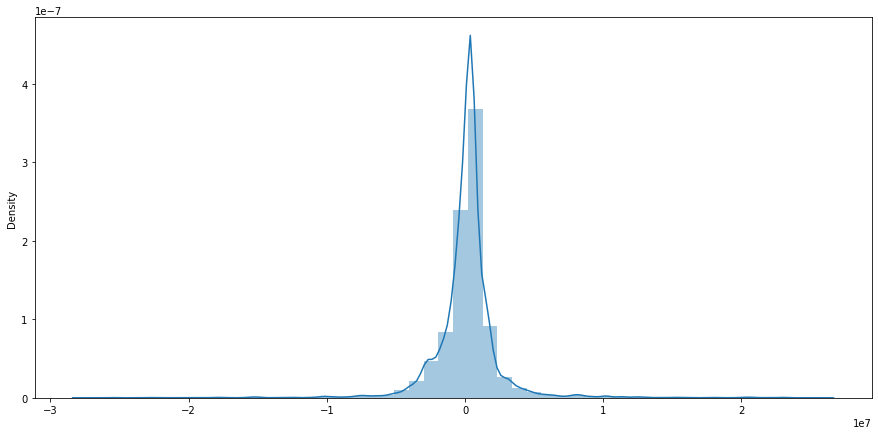

In [53]:
plt.subplots(figsize=(15,7))
sns.distplot(x=y_data['avg_delay'])

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [54]:
group = X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

### You can make another distribution plot of the "doc_id" column from x_train

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


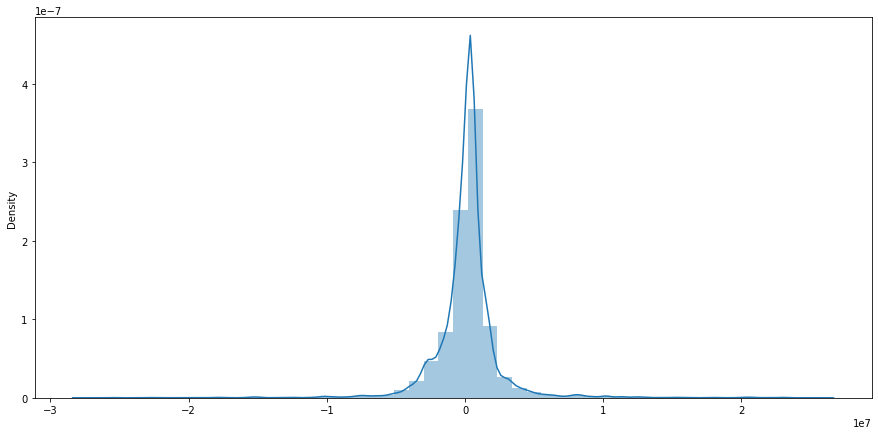

In [55]:
plt.subplots(figsize=(15,7))
sns.distplot(x=y_data['avg_delay'])

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


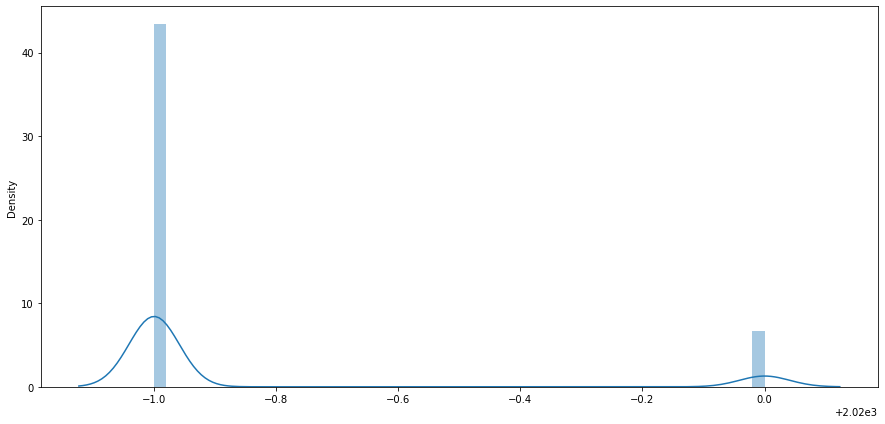

In [56]:
plt.subplots(figsize=(15,7))
sns.distplot(x=maindata['buisness_year'])

# Feature Engineering 

### Display and describe the X_train dataframe 

In [57]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
45871,U001,200792734,MDV/ systems,2019,1930254817,2019-09-12,2019-12-24,2019-12-09,NAA8,24782.89
44023,U001,200732755,KROGER corp,2019,1928873943,2019-02-28,2019-03-15,2019-02-28,NAA8,47281.36
17173,U001,200466603,SMITH'S corp,2019,1928919999,2019-12-03,2019-03-27,2019-03-12,NAA8,21631.07
6303,U001,200769623,WAL-MAR,2019,1929676289,2019-01-08,2019-08-16,2019-08-01,NAH4,53798.54
26591,U001,200769623,WAL-MAR llc,2019,1930293028,2019-12-18,2020-01-02,2019-12-18,NAH4,14575.02
...,...,...,...,...,...,...,...,...,...,...
49069,U001,200759878,SA corporation,2019,1929296999,2019-05-14,2019-05-29,2019-05-14,NAH4,14869.30
39741,U001,200020431,DEC systems,2020,1930554152,2020-02-21,2020-02-23,2020-02-16,NAM1,10381.59
1190,U001,200772670,ASSOCIAT systems,2019,1929477992,2019-12-06,2019-06-27,2019-06-12,NAU5,50578.26
43372,U001,200769623,WAL-MAR systems,2019,1929479823,2019-06-14,2019-06-29,2019-06-14,NAH4,2373.96


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [58]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train["business_code"])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [59]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [60]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [61]:
X_train.loc[:,["business_code","business_code_enc",]]

,business_code,business_code_enc
45871,U001,1
44023,U001,1
17173,U001,1
6303,U001,1
26591,U001,1
...,...,...
49069,U001,1
39741,U001,1
1190,U001,1
43372,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [62]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [63]:
X_train , X_val , X_test= custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [64]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [65]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [66]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [67]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [68]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [69]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [70]:
X_train.dtypes

cust_number                        int64
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [71]:
X_val.dtypes

cust_number                        int64
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [72]:
X_test.dtypes

cust_number                        int64
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [73]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [74]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [75]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year


### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [76]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [77]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [78]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [79]:
X_train.dtypes
X_val.dtypes
X_test.dtypes

cust_number                 int64
buisness_year               int64
doc_id                      int64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [80]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [81]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [82]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [83]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [84]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['year_of_createdate',
 'month_of_due',
 'year_of_due',
 'day_of_createdate',
 'year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

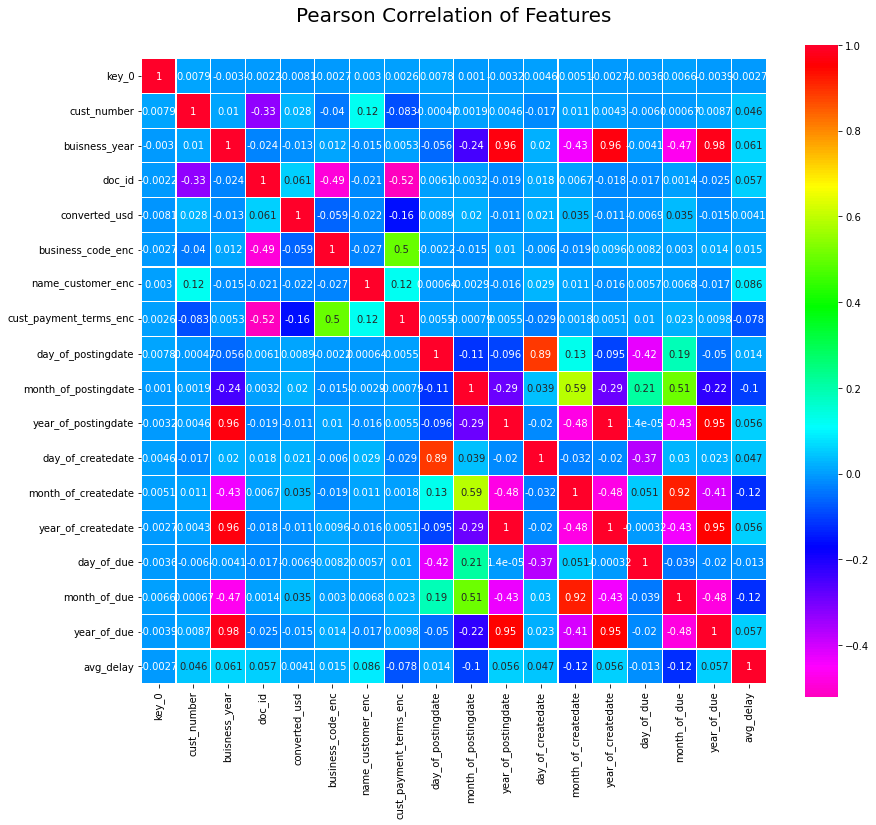

In [85]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [86]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [87]:
sel.variances_

array([1.81302418e+15, 1.15555556e-01, 8.34394774e+16, 1.35733557e+09,
       2.86906403e-01, 1.05766520e+06, 1.26540663e+02, 8.19297123e+01,
       1.19514360e+01, 1.15777202e-01, 7.80292637e+01, 1.23389611e+01,
       1.15896785e-01, 7.61302731e+01, 1.21727075e+01, 1.18773612e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [88]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [89]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [90]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [91]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2452730.0960938497

### Display The Comparison Lists

In [92]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[5737784932994.903],[0.03877367879117999],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [93]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)
Algorithm.append('SVAR')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [94]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [95]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2515861.1123481356

### Display The Comparison Lists

In [96]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVAR'],[5737784932994.903, 5983959886818.668],[0.03877367879117999, -0.002466947687696397],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [97]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)
Algorithm.append('Decision Tree Regression')

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [98]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [99]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

3119752.6937546525

### Display The Comparison Lists

In [100]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVAR', 'Decision Tree Regression'],[5737784932994.903, 5983959886818.668, 9613298319006.87],[0.03877367879117999, -0.002466947687696397, -0.6104743356141602],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [101]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)
Algorithm.append('Random Forest Regression')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [102]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [103]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2263693.1362246634

### Display The Comparison Lists


In [104]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVAR', 'Decision Tree Regression', 'Random Forest Regression'],[5737784932994.903, 5983959886818.668, 9613298319006.87, 4865348636285.598],[0.03877367879117999, -0.002466947687696397, -0.6104743356141602, 0.18492916244351187],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [105]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

[11:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [106]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [107]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2354573.8415198675

### Display The Comparison Lists


In [108]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVAR', 'Decision Tree Regression', 'Random Forest Regression', 'XGB Regressor'],[5737784932994.903, 5983959886818.668, 9613298319006.87, 4865348636285.598, 5312152101426.934],[0.03877367879117999, -0.002466947687696397, -0.6104743356141602, 0.18492916244351187, 0.11007810822719633],

## You need to make the comparison list into a comparison dataframe 

In [109]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])
Comparison

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,5.737785e+12,0.038774
1,SVAR,5.983960e+12,-0.002467
2,Decision Tree Regression,9.613298e+12,-0.610474
3,Random Forest Regression,4.865349e+12,0.184929
4,XGB Regressor,5.312152e+12,0.110078


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [110]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

[11:30:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [111]:
mean_squared_error(y_test,predictedfinal,squared=False)

2304810.643290883

### Calculate the mean Square Error for validation dataset

In [112]:
mean_squared_error(y_val,predictedfinal,squared=False)

2639050.6236774414

### Calculate the R2 score for test

In [113]:
r2_score(y_test,predictedfinal)

0.11007810822719633

### Calculate the R2 score for Validation

In [114]:
r2_score(y_val,predictedfinal)

-0.10339437577059818

### Calculate the Accuracy for train Dataset 

In [115]:
regressorfinal.score(X_train,y_train)*100

18.951916523031954

### Calculate the accuracy for validation

In [116]:
regressorfinal.score(X_val,y_val)*100

12.16654765099523

### Calculate the accuracy for test

In [117]:
regressorfinal.score(X_test,y_test)*100

11.007810822719632

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [118]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,200769623,WAL-MAR in,NaT,2020,1930624804,2020-10-03,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,200769623,WAL-MAR corporation,NaT,2020,1930850962,2020-03-05,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,200148860,DOLLA co,NaT,2020,1930637779,2020-11-03,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,200900909,SYSCO co,NaT,2020,1930702251,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


### Check for the number of rows and columns in the nulldata

In [119]:
rows = len(nulldata.axes[0])
cols = len(nulldata.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  9367
Number of Columns:  11


### Check the Description and Information of the nulldata 

In [120]:
nulldata.describe()
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9367 non-null   object        
 1   cust_number           9367 non-null   object        
 2   name_customer         9367 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9367 non-null   int64         
 5   doc_id                9367 non-null   int64         
 6   posting_date          9367 non-null   datetime64[ns]
 7   due_in_date           9367 non-null   datetime64[ns]
 8   baseline_create_date  9367 non-null   datetime64[ns]
 9   cust_payment_terms    9367 non-null   object        
 10  converted_usd         9367 non-null   float64       
dtypes: datetime64[ns](4), float64(1), int64(2), object(4)
memory usage: 878.2+ KB


### Storing the Nulldata into a different dataset 
# for BACKUP

In [121]:
nulldata1 = nulldata
nulldata1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,200769623,WAL-MAR in,NaT,2020,1930624804,2020-10-03,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,200769623,WAL-MAR corporation,NaT,2020,1930850962,2020-03-05,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,200148860,DOLLA co,NaT,2020,1930637779,2020-11-03,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,200900909,SYSCO co,NaT,2020,1930702251,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [122]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [123]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [124]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year


nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due']=nulldata['due_in_date'].dt.year

nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate']=nulldata['baseline_create_date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [125]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### Check for the datatypes of all the columns of Nulldata

In [126]:
nulldata.dtypes

business_code                     object
cust_number                        int64
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int64
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [127]:
nulldata = nulldata.drop(columns = ['business_code','baseline_create_date','due_in_date','posting_date','name_customer','clear_date','cust_payment_terms','day_of_cleardate','month_of_cleardate','year_of_cleardate'])

### Check the information of the "nulldata" dataframe

In [128]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9367 non-null   int64  
 1   buisness_year           9367 non-null   int64  
 2   doc_id                  9367 non-null   int64  
 3   converted_usd           9367 non-null   float64
 4   business_code_enc       9367 non-null   int64  
 5   day_of_postingdate      9367 non-null   int64  
 6   month_of_postingdate    9367 non-null   int64  
 7   year_of_postingdate     9367 non-null   int64  
 8   day_of_due              9367 non-null   int64  
 9   month_of_due            9367 non-null   int64  
 10  year_of_due             9367 non-null   int64  
 11  day_of_createdate       9367 non-null   int64  
 12  month_of_createdate     9367 non-null   int64  
 13  year_of_createdate      9367 non-null   int64  
 14  cust_payment_terms_enc  9367 non-null  

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [129]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7665 entries, 6338 to 19949
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             7665 non-null   int64  
 1   buisness_year           7665 non-null   int64  
 2   doc_id                  7665 non-null   int64  
 3   converted_usd           7665 non-null   float64
 4   business_code_enc       7665 non-null   int64  
 5   name_customer_enc       7665 non-null   int64  
 6   cust_payment_terms_enc  7665 non-null   int64  
 7   day_of_postingdate      7665 non-null   int64  
 8   month_of_postingdate    7665 non-null   int64  
 9   year_of_postingdate     7665 non-null   int64  
 10  day_of_createdate       7665 non-null   int64  
 11  month_of_createdate     7665 non-null   int64  
 12  year_of_createdate      7665 non-null   int64  
 13  day_of_due              7665 non-null   int64  
 14  month_of_due            7665 non-nul

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [130]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [131]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [132]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [136]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020,2960623488,2309.79,65,2698,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020,1930659387,11173.02,65,2783,21,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020,1930610806,3525.59,65,91,21,3,11,2020,11,3,2020,26,3,2020
14,200739534,2020,1930788296,121105.65,65,2020,21,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020,1930817482,3726.06,65,716,36,23,4,2020,16,4,2020,26,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,200769623,2020,1930624804,13114.99,65,2973,34,3,10,2020,10,3,2020,25,3,2020
49980,200769623,2020,1930850962,8899.71,65,2971,34,5,3,2020,3,5,2020,18,5,2020
49982,200148860,2020,1930637779,4967.06,65,796,21,3,11,2020,11,3,2020,26,3,2020
49992,200900909,2020,1930702251,1998.64,65,2745,21,25,3,2020,25,3,2020,9,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [137]:
final_result=regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [139]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [163]:
final_result.head()

0    1.859488e+06
1    1.088965e+06
2    1.600904e+06
3    1.066510e+06
4   -5.465408e+05
Name: avg_delay, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [141]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [142]:
final_result.head()

0    1.859488e+06
1    1.088965e+06
2    1.600904e+06
3    1.066510e+06
4   -5.465408e+05
Name: avg_delay, dtype: float32

### Check for the Number of Rows and Columns in your "Final" dataframe 

In [157]:
rows = len(nulldata.axes[0])
cols = len(nulldata.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  9367
Number of Columns:  16


### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [143]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [164]:
Final.loc[:,["clear_date"]]

,clear_date
0,2020-05-01 12:31:27.625000
1,2020-04-15 14:29:24.750000
2,2020-04-13 12:41:44.000000
3,2020-05-12 08:15:09.875000
4,2020-04-19 16:10:59.187500
...,...
9362,2020-04-07 03:17:35.250000
9363,2020-05-27 18:52:50.000000
9364,2020-04-16 10:08:23.750000
9365,2020-04-28 08:59:35.375000


### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [145]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [166]:
final_result.head()

0    1.859488e+06
1    1.088965e+06
2    1.600904e+06
3    1.066510e+06
4   -5.465408e+05
Name: avg_delay, dtype: float32

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [146]:
bins=[0,15,30,45,60,100]
labels =  ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [147]:
Final= Final.drop(columns = ['key_0','avg_delay'])

### Display the count of each categoty of new "Aging Bucket" column 

In [148]:
Final['Aging Bucket'].value_counts()

0-15               5062
16-30              3764
31-45                78
46-60                15
Greatar than 60       1
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [155]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,business_code_enc,day_of_cleardate,month_of_cleardate,year_of_cleardate,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_due,month_of_due,year_of_due,day_of_createdate,month_of_createdate,year_of_createdate,cust_payment_terms_enc,name_customer_enc,Aging Bucket
0,CA02,140105686,SYSC llc,2020-05-01 12:31:27.625000,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,65,NaN,NaN,NaN,30,3,2020,10,4,2020,31,3,2020,5,2698,16-30
1,U001,200744019,TARG us,2020-04-15 14:29:24.750000,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,65,NaN,NaN,NaN,19,3,2020,3,4,2020,19,3,2020,21,2783,0-15
2,U001,200418007,AM,2020-04-13 12:41:44.000000,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.59,65,NaN,NaN,NaN,3,11,2020,26,3,2020,11,3,2020,21,91,16-30
3,U001,200739534,OK systems,2020-05-12 08:15:09.875000,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,65,NaN,NaN,NaN,15,4,2020,30,4,2020,15,4,2020,21,2020,0-15
4,U001,200353024,DECA corporation,2020-04-19 16:10:59.187500,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,65,NaN,NaN,NaN,23,4,2020,26,4,2020,16,4,2020,36,716,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,U001,200769623,WAL-MAR in,2020-04-07 03:17:35.250000,2020,1930624804,2020-10-03,2020-03-25,2020-03-10,NAH4,13114.99,65,NaN,NaN,NaN,3,10,2020,25,3,2020,10,3,2020,34,2973,0-15
9363,U001,200769623,WAL-MAR corporation,2020-05-27 18:52:50.000000,2020,1930850962,2020-03-05,2020-05-18,2020-05-03,NAH4,8899.71,65,NaN,NaN,NaN,5,3,2020,18,5,2020,3,5,2020,34,2971,0-15
9364,U001,200148860,DOLLA co,2020-04-16 10:08:23.750000,2020,1930637779,2020-11-03,2020-03-26,2020-03-11,NAA8,4967.06,65,NaN,NaN,NaN,3,11,2020,26,3,2020,11,3,2020,21,796,16-30
9365,U001,200900909,SYSCO co,2020-04-28 08:59:35.375000,2020,1930702251,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,65,NaN,NaN,NaN,25,3,2020,9,4,2020,25,3,2020,21,2745,16-30


### Store this dataframe into the .csv format

In [152]:
Final.to_csv("manish HRC")


In [153]:
from google.colab import files
files.download('manish HRC')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# END OF THE PROJECT